In [1]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

### Movie Reviews Binary Classification using the IMDB Dataset

In [2]:
# Load the data
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=5000) # my cpu can't handle 6GB of data (5000 instead of 10000)

2024-07-05 23:08:07.815063: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-05 23:08:07.864381: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-05 23:08:07.924944: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-05 23:08:07.983330: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-05 23:08:07.983708: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-05 23:08:08.069569: I tensorflow/core/platform/cpu_feature_guard.cc:

In [3]:
# Decoder
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decode_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

### Preprocessing

In [4]:
# Encoding the integer sequences (of varying length) via multi-hot encoding (to constant length)
import numpy as np
def vectorize_sequences(sequences, dimension=5000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for col in sequence:
            results[i, col] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


# each sequence is series of numbers ranging from 0 to 9999
# x_train: each row is a sample, each column is whether the corresponding digit was present in the sentence

In [5]:
# Vectorizing the labels
y_train = np.array(train_labels).astype("float32")
y_test = np.array(test_labels).astype("float32")

### Building and Compiling a DNN

In [6]:
import keras
from keras import layers

# Building the Sequential Model
model = keras.Sequential()
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [7]:
# Compilation
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [8]:
# Split data for validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
print(f"\n\nshapes x_val={x_val.shape}, partial_x_train={partial_x_train.shape}, y_val={y_val.shape}, partial_y_train={partial_y_train.shape}")



shapes x_val=(10000, 5000), partial_x_train=(15000, 5000), y_val=(10000,), partial_y_train=(15000,)


In [9]:
# Validation

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=[x_val, y_val]
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6813 - loss: 0.6226 - val_accuracy: 0.7747 - val_loss: 0.5050
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8640 - loss: 0.4093 - val_accuracy: 0.8691 - val_loss: 0.3522
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8981 - loss: 0.3036 - val_accuracy: 0.8826 - val_loss: 0.3080
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9149 - loss: 0.2478 - val_accuracy: 0.8822 - val_loss: 0.2944
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9273 - loss: 0.2159 - val_accuracy: 0.8680 - val_loss: 0.3201
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9280 - loss: 0.1988 - val_accuracy: 0.8853 - val_loss: 0.2898
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9368 - loss: 0.1756 - val_accuracy: 0.8827 - val_loss: 0.2876
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9455 - loss: 0.1623 - val_accuracy: 0.8827 - v

### Plot the training history

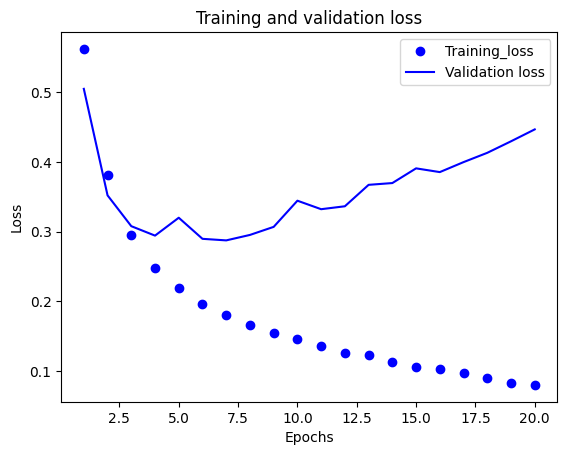

In [10]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training_loss") # bo - blue dot
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

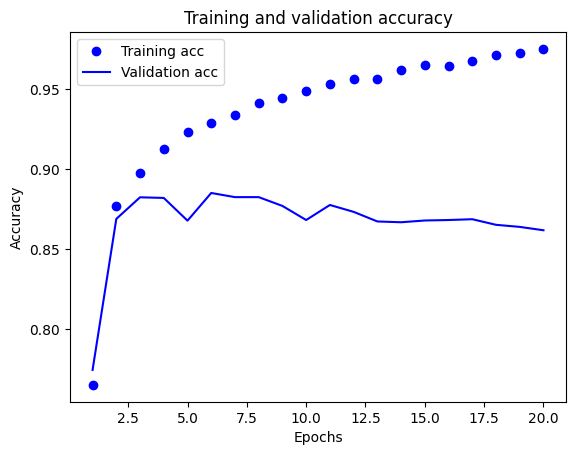

In [11]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()    
plt.show()

### Retrain the model for a smaller epochs to avoid overfitting

In [12]:
np.unique(y_train)

array([0., 1.], dtype=float32)

In [13]:
import keras
import keras.layers as layers

new_model = keras.Sequential()
new_model.add(layers.Dense(16, activation="relu"))
new_model.add(layers.Dense(16, activation="relu"))
new_model.add(layers.Dense(1, activation="sigmoid"))

new_model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

new_model.fit(x_train, y_train, epochs=4, batch_size=512)
results = new_model.evaluate(x_test, y_test)
print(f"\n\nTraining Loss & Accuracy: {results}")


Epoch 1/4


2024-07-05 23:08:25.982704: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 500000000 exceeds 10% of free system memory.


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.5682 - sparse_categorical_accuracy: 0.4991
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2992 - sparse_categorical_accuracy: 0.4954
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2401 - sparse_categorical_accuracy: 0.4982
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2117 - sparse_categorical_accuracy: 0.5029
 26/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2785 - sparse_categorical_accuracy: 0.5125    

2024-07-05 23:08:29.382983: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 500000000 exceeds 10% of free system memory.


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2937 - sparse_categorical_accuracy: 0.5073
Training Loss & Accuracy: [0.2923028767108917, 0.5]
